### CV libraries in Pytorch
* torchvision
* torchvision.datasets  (this notebook will use FashionMINIST())
* torchvision.models
* torchvision.transforms
* torch.utils.data.Dataset  (base dataset class)
* torch.utils.data.DataLoader (create a python iterable over a dataset)

Note: The torch.utils.data.Dataset and torch.utils.data.DataLoader classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

DataLoader:将图像数据变成python批迭代器用于在每epoch处理批次的生成。

In [32]:
# outlines
# import torch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualize
import matplotlib.pyplot as plt

# check torch version
print(torch.__version__)
print(torchvision.__version__)

2.1.2
0.16.2


### Prepare data sets

In [33]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [34]:
# check first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [35]:
# check image shape (NCHW but NHWC works better)
image.shape

torch.Size([1, 28, 28])

In [36]:
# check data and targets of train data
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [38]:
# find classes by .classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

Image shape: torch.Size([1, 28, 28])


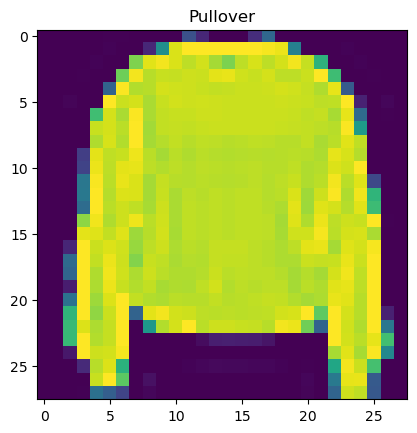

In [58]:
# visualize image by plt.imshow()
import matplotlib.pyplot as plt
image, label = train_data[7]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label]);

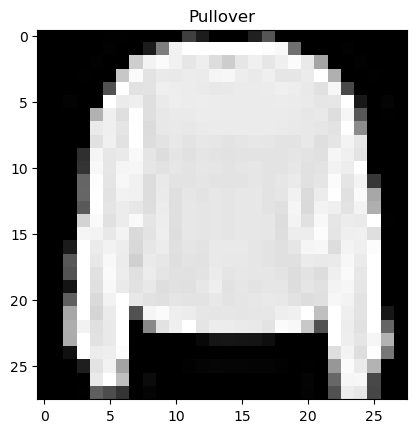

In [55]:
# can use cmap to turn image into gray
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

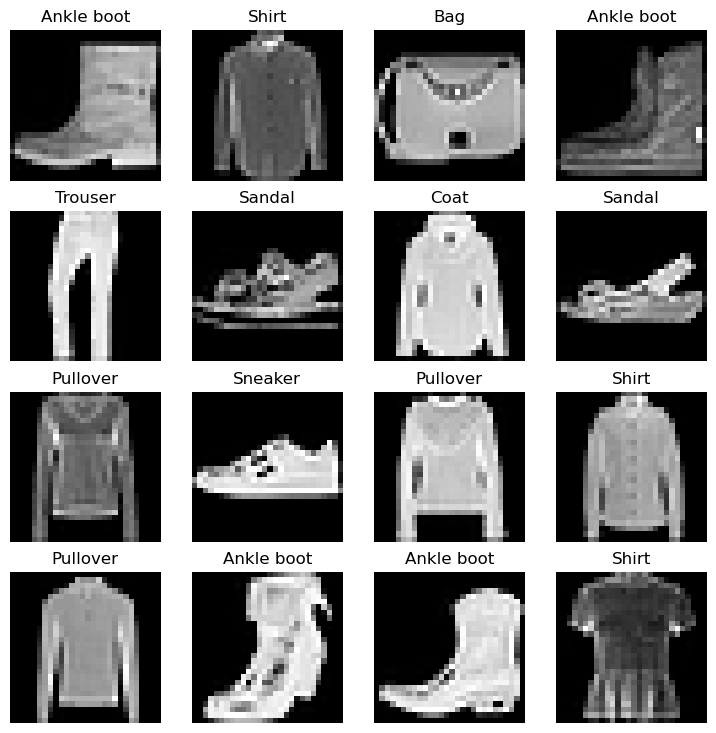

In [59]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [60]:
# create dataloader for train and test sets (parameters: batch_size, shuffle)
# shuffle the train data, don't shuffle the test data
from torch.utils.data import DataLoader

# setup batch size
BATCH_SIZE = 32

# True datasets into iterables batches
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
print(f"train_dataloader: {train_dataloader}")
print(f"test_dataloader: {test_dataloader}")
print(f"the length: {len(train_dataloader)}, {len(test_dataloader)}")

train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x151176d90>
test_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x15128cd50>
the length: 1875, 313


In [63]:
1875 * 32, 313 * 32

(60000, 10016)

In [64]:
# check what's inside the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [68]:
train_features_batch.shape, train_labels_batch.shape, train_labels_batch

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
         9, 7, 8, 8, 3, 3, 7, 2]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


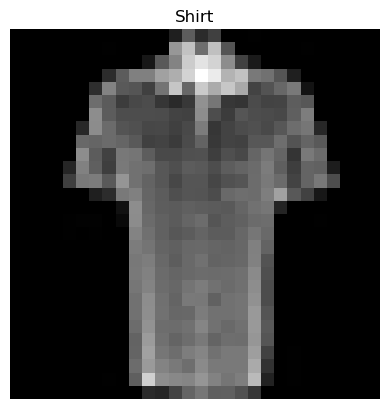

In [77]:
# check if the image changed by visualize image
# show a image
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Build model 0 the baseline

In [78]:
# build the model 0 with 2 nn.Linear() layers
# this time need a nn.Flatten() to make the 2dims into a vector
# try how the nn.Flatten() works
flatten_model = nn.Flatten()
# get a single sample
x = train_features_batch[0]
# flatten the sample
output = flatten_model(x)

# print out the shape
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [80]:
# bulid the model class with one Flatten and two Linear layers
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [81]:
# init model 0 with input 784(28x28), output len(class_names), and put the model to cpu
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names))
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [82]:
# import accuracy_fn or define it again
from helper_functions import accuracy_fn

In [84]:
# create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [86]:
# create a function to time experiment
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
    """
    Print difference between start and end time.
    Args:
        start(float): start time of computation.
        end(float): end time of computation.
        device([type], optional): Device that compute is running on.
                                  Default is None.
    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [97]:
# create training and test loop!!!
# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set epochs
epochs = 3

# create training and testing loop
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-----")
    ### training
    # init train loss for every epoch
    train_loss = 0

    # loop through every training batch
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1-forward pass
        y_pred = model_0(X)

        # 2-calculate loss of per batch
        loss = loss_fn(y_pred, y)

        # 3-optimizer zero grad
        optimizer.zero_grad()

        # 4-loss backward
        loss.backward()

        # 5-optimizer step
        optimizer.step()

        # print out how many samples have been trained on 
        if batch % 400 == 0:
            image_count = batch * len(X)
            total_count = len(train_dataloader.dataset)
            print(f"Looked {image_count} samples out of {total_count}")


    # Divede total train loss by length of train dataloader (1875)
    # to get average loss per batch
    train_loss /= len(train_dataloader)

    ### testing
    # setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1-forward pass
            test_pred = model_0(X)

            # 2-calculate loss
            test_loss += loss_fn(test_pred, y)

            # 3-calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # calculations on test metrics need to happen inside torch.inference_mode
        # divide total test loss by length of test dataloader per batch
        test_loss /= len(test_dataloader)

        # divide total test acc by length of test dataloader per batch
        test_acc /= len(test_dataloader)

    ### print out loss and acc every epoch
    print(f"\ntrain_loss: {train_loss:.5f} | test_loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

Epoch: 0
-----
Looked 0 samples out of 60000
Looked 12800 samples out of 60000
Looked 25600 samples out of 60000
Looked 38400 samples out of 60000
Looked 51200 samples out of 60000

train_loss: 0.00000 | test_loss: 0.48250 | test_acc: 83.00%

Epoch: 1
-----
Looked 0 samples out of 60000
Looked 12800 samples out of 60000
Looked 25600 samples out of 60000
Looked 38400 samples out of 60000
Looked 51200 samples out of 60000

train_loss: 0.00000 | test_loss: 0.47251 | test_acc: 83.63%

Epoch: 2
-----
Looked 0 samples out of 60000
Looked 12800 samples out of 60000
Looked 25600 samples out of 60000
Looked 38400 samples out of 60000
Looked 51200 samples out of 60000

train_loss: 0.00000 | test_loss: 0.47143 | test_acc: 83.58%

Train time on cpu: 7.421 seconds


In [92]:
len(train_dataloader.dataset), 400 * 32, len(train_dataloader)

(60000, 12800, 1875)

### Make predictions and get baseline results

In [98]:
# create a function to predict and evaluate model!!!
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader.
    Args:
        model (torch.nn.Module): A model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # make prediction with the model
            y_pred = model(X)

            # accumulate the loss and accuracy every batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # calculate the average loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model is created with class
            "model_loss": loss.item(),
            "model_acc": acc}

In [99]:
# get model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47143012285232544,
 'model_acc': 83.57627795527156}

### Setup device agnostic-code (for using a GPU if there is one)

In [27]:
# setup device agnostic code


### Model 1: Building a better model with non-linearity